In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
import warnings
from pyramid.arima import auto_arima

warnings.filterwarnings('ignore')
plt.style.use('bmh')
%matplotlib inline

In [2]:
# Load the dataset
data = pd.read_csv('../raw data/EOS-USD.csv')

In [3]:
# Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data.resample('D').mean()
data = data.ffill()

In [4]:
# Check missing values
np.where(np.isnan(data))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-28,0.850,0.9845,0.6000,0.850,0.850,13984.0
2017-06-29,0.850,1.9100,0.6500,0.912,0.912,22117.0
2017-06-30,0.912,1.3500,0.8000,1.050,1.050,125944.0
2017-07-01,1.050,3.8800,0.9455,3.000,3.000,7026243.0
2017-07-02,3.000,6.9000,2.5000,4.200,4.200,21951537.0


In [6]:
data.index

DatetimeIndex(['2017-06-28', '2017-06-29', '2017-06-30', '2017-07-01',
               '2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05',
               '2017-07-06', '2017-07-07',
               ...
               '2019-03-23', '2019-03-24', '2019-03-25', '2019-03-26',
               '2019-03-27', '2019-03-28', '2019-03-29', '2019-03-30',
               '2019-03-31', '2019-04-01'],
              dtype='datetime64[ns]', name='Date', length=643, freq='D')

<table><tr><td bgcolor=orange><font size=3> SARIMA for "High"

In [7]:
y = data['High']

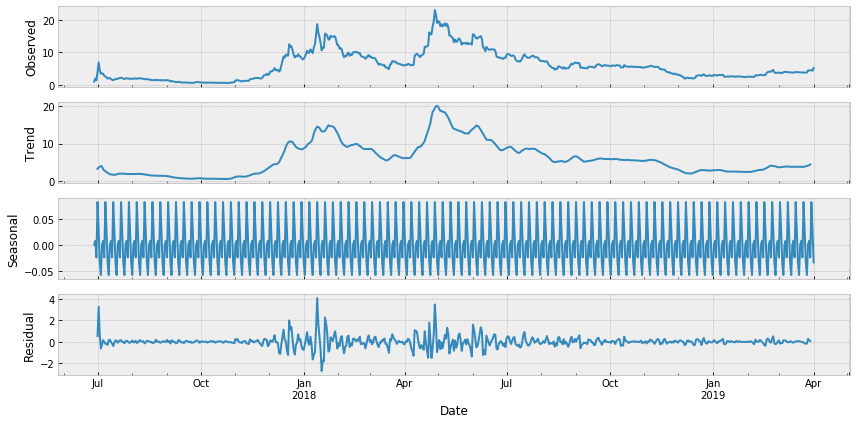

In [8]:
rcParams['figure.figsize'] = 12, 6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [9]:
# y = y['2016':]

In [10]:
# rcParams['figure.figsize'] = 12, 6

# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()

### Build a Baseline Model

In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.resample('MS').mean()
    rolstd = timeseries.resample('MS').std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    print()
    #Perform Ljung-Box test:
    print('Results of Ljung-Box Test:')
    lbtest = acorr_ljungbox(timeseries, lags=5)
    for i in range(5):
        print('Largest Lag Included:{} Test Statistic={}  p-value={}'.format(i, lbtest[0][i], lbtest[1][i]))

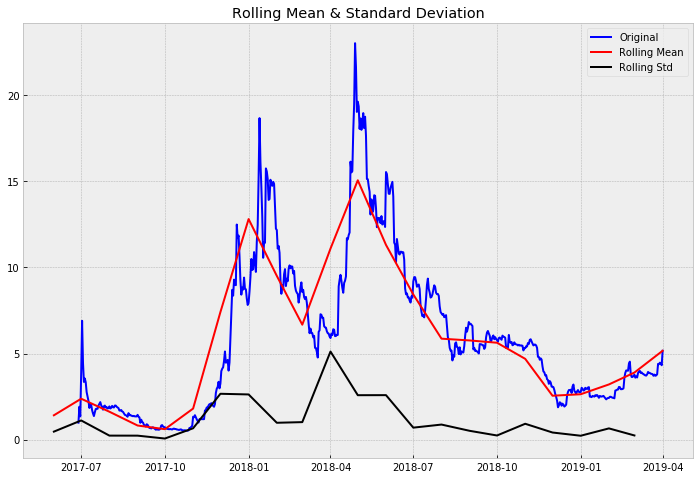

Results of Dickey-Fuller Test:
Test Statistic                  -2.079980
p-value                          0.252641
#Lags Used                       8.000000
Number of Observations Used    634.000000
Critical Value (1%)             -3.440706
Critical Value (5%)             -2.866110
Critical Value (10%)            -2.569203
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=631.0522203658904  p-value=2.951028212867009e-139
Largest Lag Included:1 Test Statistic=1245.8999710928013  p-value=2.8592937534548577e-271
Largest Lag Included:2 Test Statistic=1844.5556408873788  p-value=0.0
Largest Lag Included:3 Test Statistic=2429.085404643985  p-value=0.0
Largest Lag Included:4 Test Statistic=3004.8164383038556  p-value=0.0


In [12]:
test_stationarity(y)

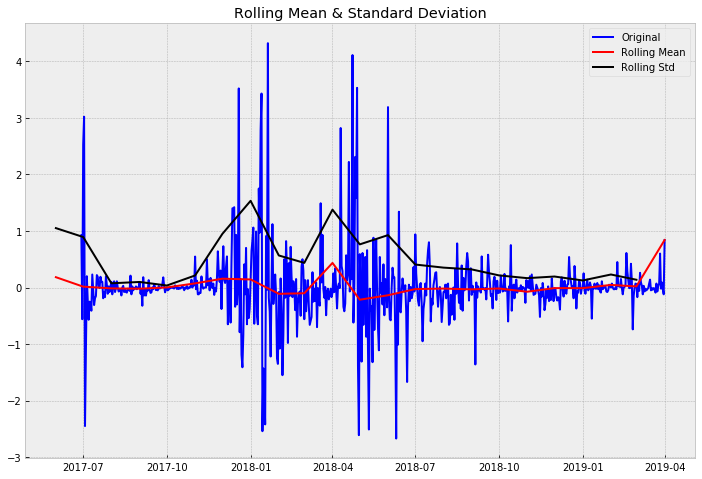

Results of Dickey-Fuller Test:
Test Statistic                -7.606874e+00
p-value                        2.309760e-11
#Lags Used                     9.000000e+00
Number of Observations Used    6.320000e+02
Critical Value (1%)           -3.440739e+00
Critical Value (5%)           -2.866124e+00
Critical Value (10%)          -2.569211e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=6.912160713437622  p-value=0.008561147378230854
Largest Lag Included:1 Test Statistic=6.920218455188112  p-value=0.03142632920856288
Largest Lag Included:2 Test Statistic=7.313309308294959  p-value=0.06255443977701543
Largest Lag Included:3 Test Statistic=20.64829215086681  p-value=0.00037177980215746744
Largest Lag Included:4 Test Statistic=21.361862170053115  p-value=0.0006919467386212287


In [13]:
test_stationarity(y.diff(1).dropna())

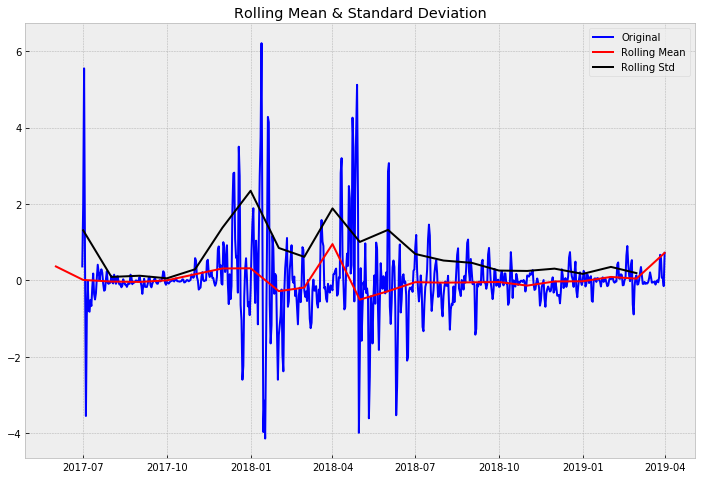

Results of Dickey-Fuller Test:
Test Statistic                -5.897107e+00
p-value                        2.834390e-07
#Lags Used                     1.900000e+01
Number of Observations Used    6.210000e+02
Critical Value (1%)           -3.440924e+00
Critical Value (5%)           -2.866205e+00
Critical Value (10%)          -2.569255e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=191.4039691747802  p-value=1.569931428395064e-43
Largest Lag Included:1 Test Statistic=191.97461955429466  p-value=2.0570319206333264e-42
Largest Lag Included:2 Test Statistic=198.18235837462322  p-value=1.0420661044051699e-42
Largest Lag Included:3 Test Statistic=208.69795517216028  p-value=5.063434160472231e-44
Largest Lag Included:4 Test Statistic=209.1648240174317  p-value=3.1059988687711893e-43


In [14]:
test_stationarity(y.diff(2).dropna())

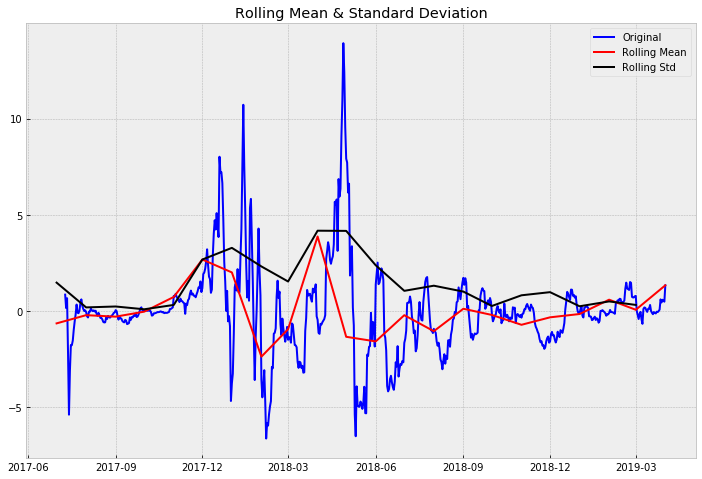

Results of Dickey-Fuller Test:
Test Statistic                  -4.772408
p-value                          0.000061
#Lags Used                      14.000000
Number of Observations Used    616.000000
Critical Value (1%)             -3.441010
Critical Value (5%)             -2.866243
Critical Value (10%)            -2.569275
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=541.9438079327067  p-value=7.121354212482274e-120
Largest Lag Included:1 Test Statistic=980.1190616497768  p-value=1.4785974696776383e-213
Largest Lag Included:2 Test Statistic=1318.9029423105735  p-value=1.164770560332513e-285
Largest Lag Included:3 Test Statistic=1576.6682515198768  p-value=0.0
Largest Lag Included:4 Test Statistic=1790.78112923613  p-value=0.0


In [15]:
test_stationarity(y.diff(12).dropna())

#### According to the decomposition of y_train, seasonality is relatively small. 
#### Comparing the results of the first and second difference, we use the first difference.

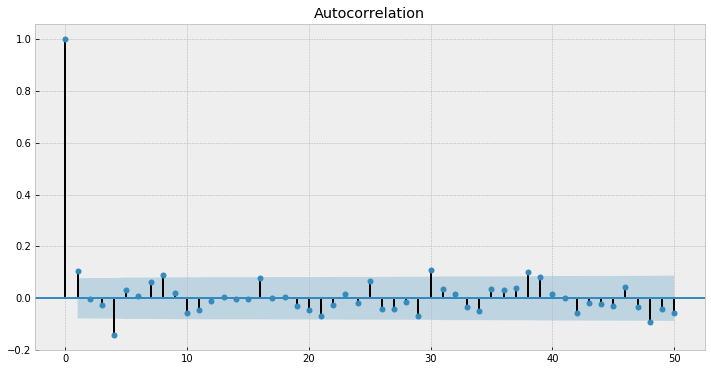

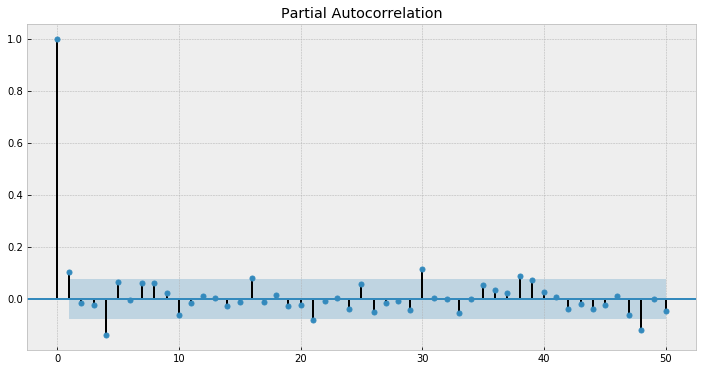

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
acf = plot_acf(y.diff(1).dropna(), lags=50)
pacf = plot_pacf(y.diff(1).dropna(), lags=50)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4666      0.075     -6.259      0.000      -0.613      -0.320
ma.L1          0.5716      0.074      7.769      0.000       0.427       0.716
sigma2         0.4056      0.008     50.039      0.000       0.390       0.421
1244.837914358271


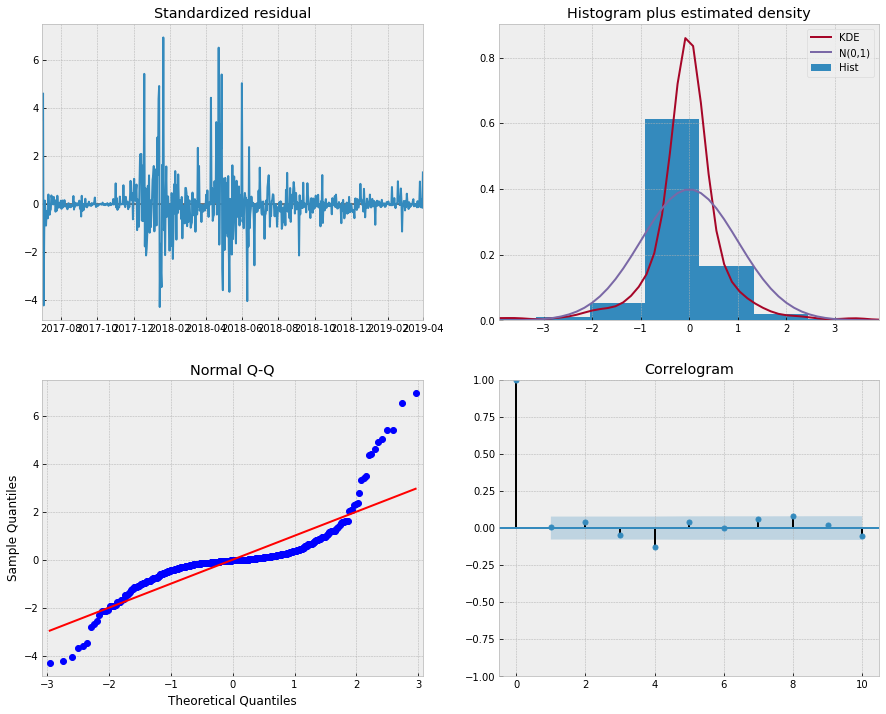

In [17]:
mod_baseline = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order = (0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_baseline = mod_baseline.fit()

print(results_baseline.summary().tables[1])
print(results_baseline.aic)
b = results_baseline.plot_diagnostics(figsize=(15, 12))

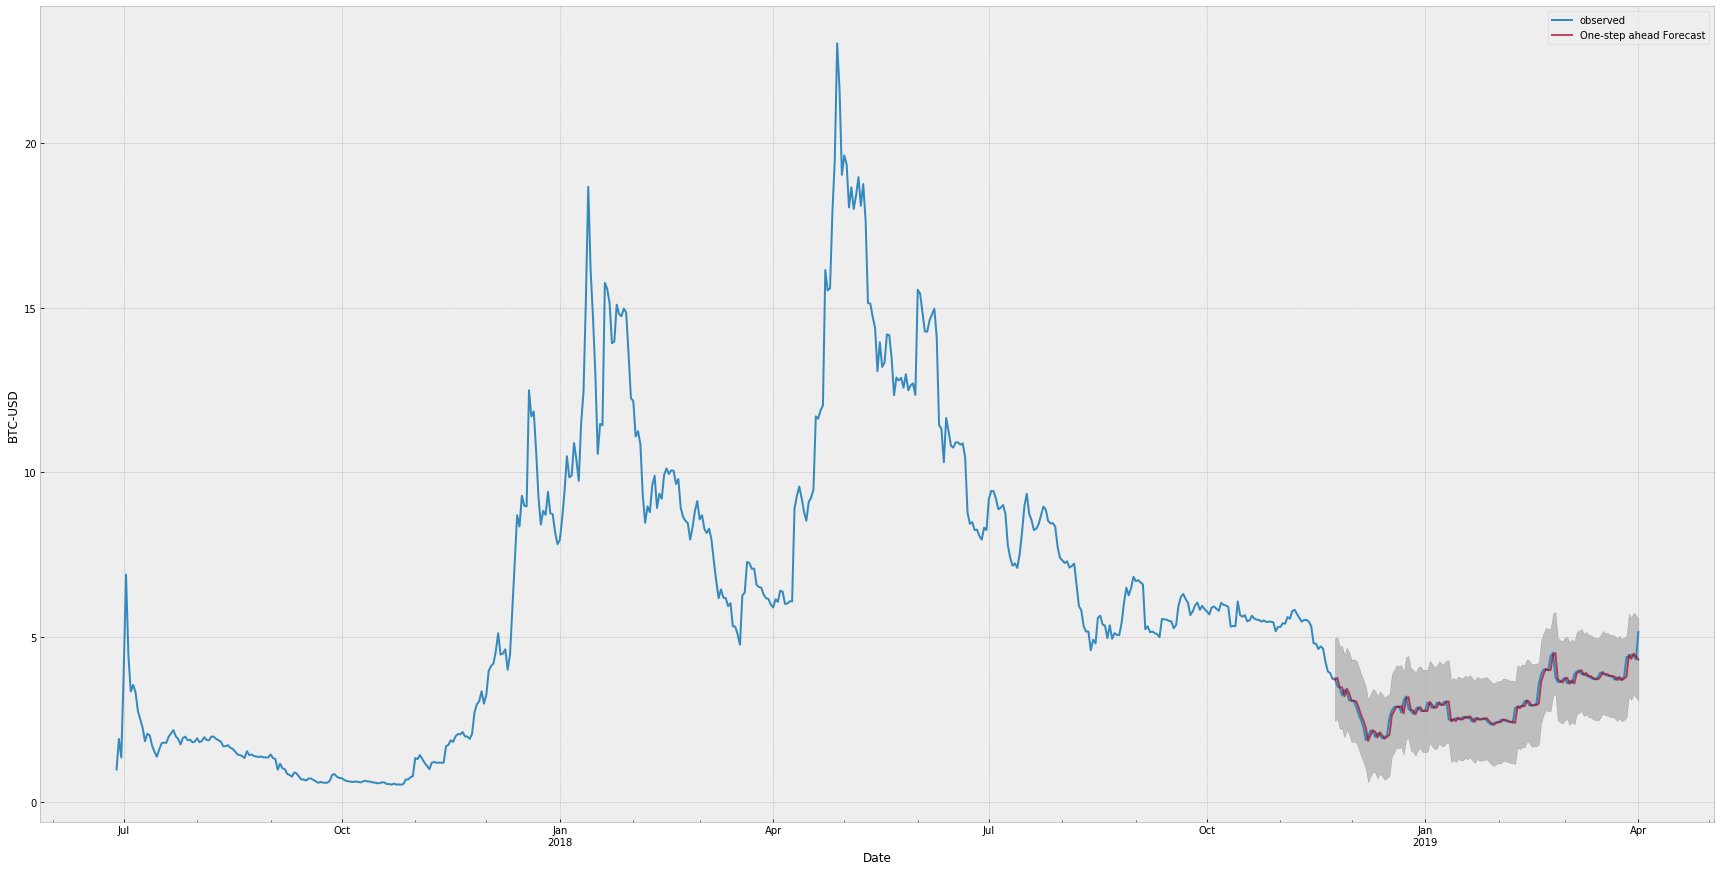

In [18]:
pred = results_baseline.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [19]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 0.0349
The R2 of our model is 0.9263


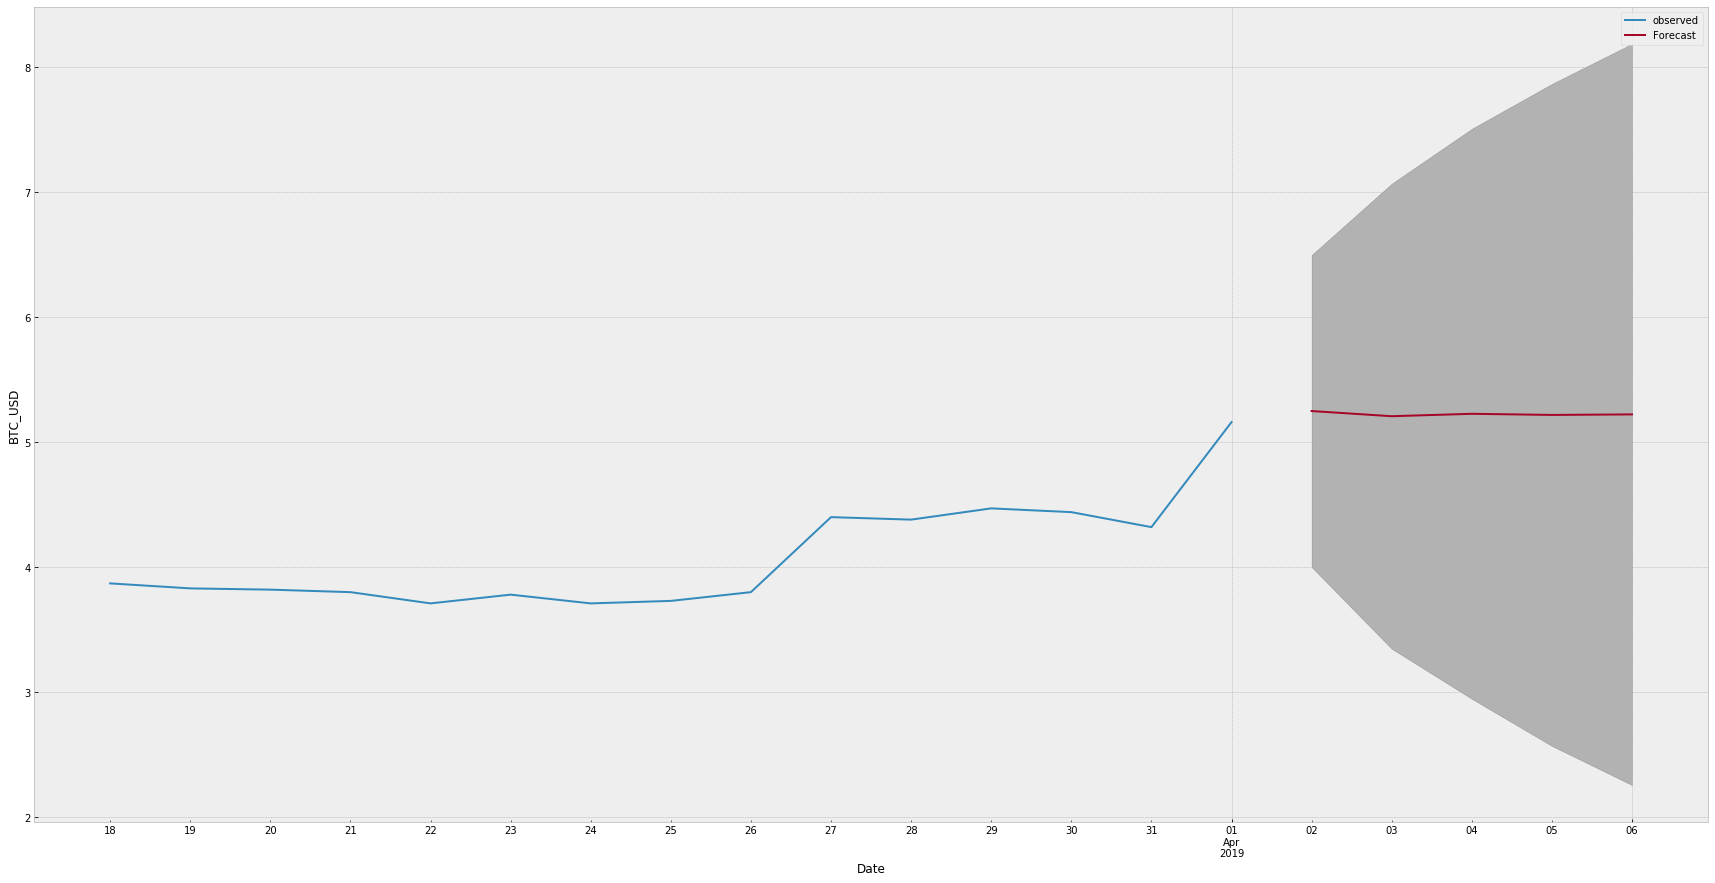

In [20]:
# Forcast the future
pred_uc = results_baseline.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

### Build an Advanced Model by Grid Search

In [21]:
d = [1]
p = q = range(21)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(0, 0, 0, 12)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-1], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 0, 0, 12)
SARIMAX: (0, 1, 2) x (0, 0, 0, 12)
SARIMAX: (20, 1, 19) x (0, 0, 0, 12)
SARIMAX: (20, 1, 20) x (0, 0, 0, 12)


In [22]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)

        except:
            continue

print('Finished...')

AIC_list = AIC_list.dropna()
m = np.amin(AIC_list['AIC'].values) # Find the minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find the index number of the lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1251.424247305851
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1244.2187546405953
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:1228.7249070310045
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:1210.0359781260809
ARIMA(0, 1, 4)x(0, 0, 0, 12)12 - AIC:1176.4160347454658
ARIMA(0, 1, 5)x(0, 0, 0, 12)12 - AIC:1171.4742079487087
ARIMA(0, 1, 6)x(0, 0, 0, 12)12 - AIC:1172.0879807323572
ARIMA(0, 1, 7)x(0, 0, 0, 12)12 - AIC:1172.739439663201
ARIMA(0, 1, 8)x(0, 0, 0, 12)12 - AIC:1166.110253101269
ARIMA(0, 1, 9)x(0, 0, 0, 12)12 - AIC:1165.944293522665
ARIMA(0, 1, 10)x(0, 0, 0, 12)12 - AIC:1164.994862443435
ARIMA(0, 1, 11)x(0, 0, 0, 12)12 - AIC:1162.6745333969552
ARIMA(0, 1, 12)x(0, 0, 0, 12)12 - AIC:1163.296093085324
ARIMA(0, 1, 13)x(0, 0, 0, 12)12 - AIC:1164.2256771344744
ARIMA(0, 1, 14)x(0, 0, 0, 12)12 - AIC:1165.118458755348
ARIMA(0, 1, 15)x(0, 0, 0, 12)12 - AIC:1166.13585978316
ARIMA(0, 1, 16)x(0, 0, 0, 12)12 - AIC:1162.7341167569543
ARIMA(0, 1, 17)x(0, 0, 0, 12)12 - AIC:1163.6127332

ARIMA(6, 1, 20)x(0, 0, 0, 12)12 - AIC:1165.2495587062026
ARIMA(7, 1, 0)x(0, 0, 0, 12)12 - AIC:1173.2871018313429
ARIMA(7, 1, 1)x(0, 0, 0, 12)12 - AIC:1174.729692204349
ARIMA(7, 1, 2)x(0, 0, 0, 12)12 - AIC:1175.116422211811
ARIMA(7, 1, 3)x(0, 0, 0, 12)12 - AIC:11265.24481148319
ARIMA(7, 1, 4)x(0, 0, 0, 12)12 - AIC:1185.5566447053584
ARIMA(7, 1, 5)x(0, 0, 0, 12)12 - AIC:1176.870122201918
ARIMA(7, 1, 6)x(0, 0, 0, 12)12 - AIC:1177.6730664084785
ARIMA(7, 1, 7)x(0, 0, 0, 12)12 - AIC:1173.8334646687977
ARIMA(7, 1, 8)x(0, 0, 0, 12)12 - AIC:1175.8147241485526
ARIMA(7, 1, 9)x(0, 0, 0, 12)12 - AIC:1175.5007512854881
ARIMA(7, 1, 10)x(0, 0, 0, 12)12 - AIC:1172.2917901454534
ARIMA(7, 1, 11)x(0, 0, 0, 12)12 - AIC:1171.452517170908
ARIMA(7, 1, 12)x(0, 0, 0, 12)12 - AIC:1164.8328912551576
ARIMA(7, 1, 13)x(0, 0, 0, 12)12 - AIC:1167.282331102354
ARIMA(7, 1, 14)x(0, 0, 0, 12)12 - AIC:1167.4443295545339
ARIMA(7, 1, 15)x(0, 0, 0, 12)12 - AIC:1173.2490429095733
ARIMA(7, 1, 16)x(0, 0, 0, 12)12 - AIC:1166.9308

ARIMA(13, 1, 18)x(0, 0, 0, 12)12 - AIC:1172.1077412714626
ARIMA(13, 1, 19)x(0, 0, 0, 12)12 - AIC:1171.2460580860834
ARIMA(13, 1, 20)x(0, 0, 0, 12)12 - AIC:1170.6213434466947
ARIMA(14, 1, 0)x(0, 0, 0, 12)12 - AIC:1168.21472756809
ARIMA(14, 1, 1)x(0, 0, 0, 12)12 - AIC:1170.2038789563615
ARIMA(14, 1, 2)x(0, 0, 0, 12)12 - AIC:1169.9121639182451
ARIMA(14, 1, 3)x(0, 0, 0, 12)12 - AIC:1171.841940421476
ARIMA(14, 1, 4)x(0, 0, 0, 12)12 - AIC:1173.7626098158862
ARIMA(14, 1, 5)x(0, 0, 0, 12)12 - AIC:1176.1267919095746
ARIMA(14, 1, 6)x(0, 0, 0, 12)12 - AIC:1178.6391394004092
ARIMA(14, 1, 7)x(0, 0, 0, 12)12 - AIC:1178.6841172951454
ARIMA(14, 1, 8)x(0, 0, 0, 12)12 - AIC:1181.9721665498098
ARIMA(14, 1, 9)x(0, 0, 0, 12)12 - AIC:1180.1695244006905
ARIMA(14, 1, 10)x(0, 0, 0, 12)12 - AIC:1180.783996625864
ARIMA(14, 1, 11)x(0, 0, 0, 12)12 - AIC:1180.9719438988334
ARIMA(14, 1, 12)x(0, 0, 0, 12)12 - AIC:1176.6717242133354
ARIMA(14, 1, 13)x(0, 0, 0, 12)12 - AIC:1176.739524231183
ARIMA(14, 1, 14)x(0, 0, 0, 12

ARIMA(20, 1, 15)x(0, 0, 0, 12)12 - AIC:1178.8501965659793
ARIMA(20, 1, 16)x(0, 0, 0, 12)12 - AIC:1179.088565793645
ARIMA(20, 1, 17)x(0, 0, 0, 12)12 - AIC:1181.184653448386
ARIMA(20, 1, 18)x(0, 0, 0, 12)12 - AIC:1179.030771613587
ARIMA(20, 1, 19)x(0, 0, 0, 12)12 - AIC:1175.7500576923405
ARIMA(20, 1, 20)x(0, 0, 0, 12)12 - AIC:1177.7305072387862
Finished...


### Min_AIC_list ### 
param                (3, 1, 12)
param_seasonal    (0, 0, 0, 12)
AIC                     1162.66
Name: 75, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3187      3.527      0.374      0.709      -5.595       8.232
ar.L2         -0.4333      5.717     -0.076      0.940     -11.638      10.772
ar.L3         -0.2778      3.255     -0.085      0.932      -6.658       6.102
ma.L1         -1.2236      3.529     -0.347      0.729      -8.140       5.692
ma.L2          0.3519      5.384      0.065      0.948     -10.201      10.905
ma.L3          0.2393      2.868      0.083      0.934      -5.382       5.861
ma.L4         -0.0634      0.039     -1.619      0.105      -0.140       0.013
ma.L5          0.2675      0.223      1.199      0.230      -0.170       0.705
ma.L6         -0.1417      1.011     -0.140      0.889      -2.124  

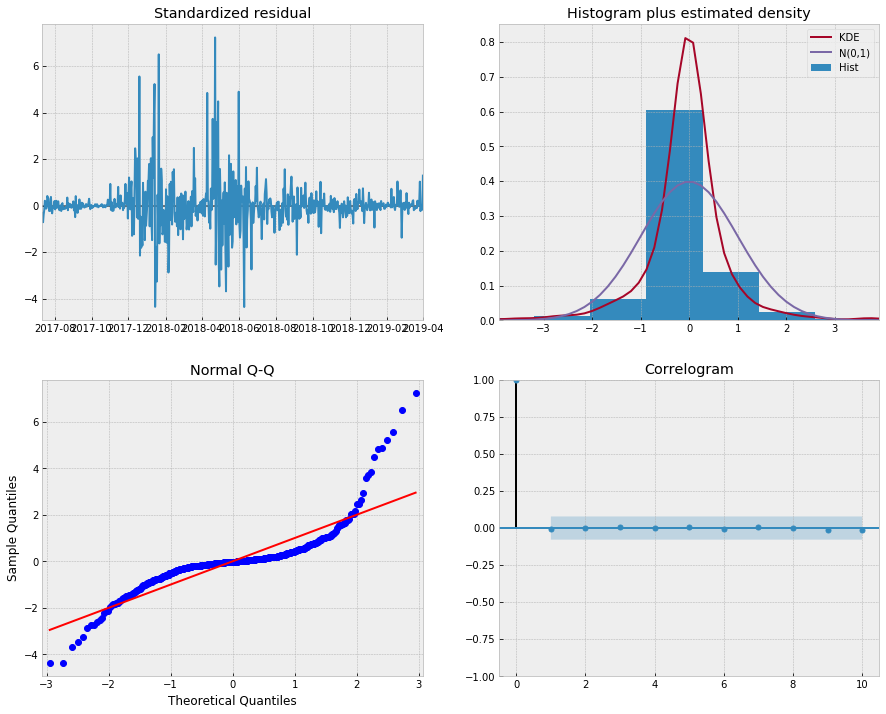

In [23]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])
dia = results.plot_diagnostics(figsize=(15, 12))

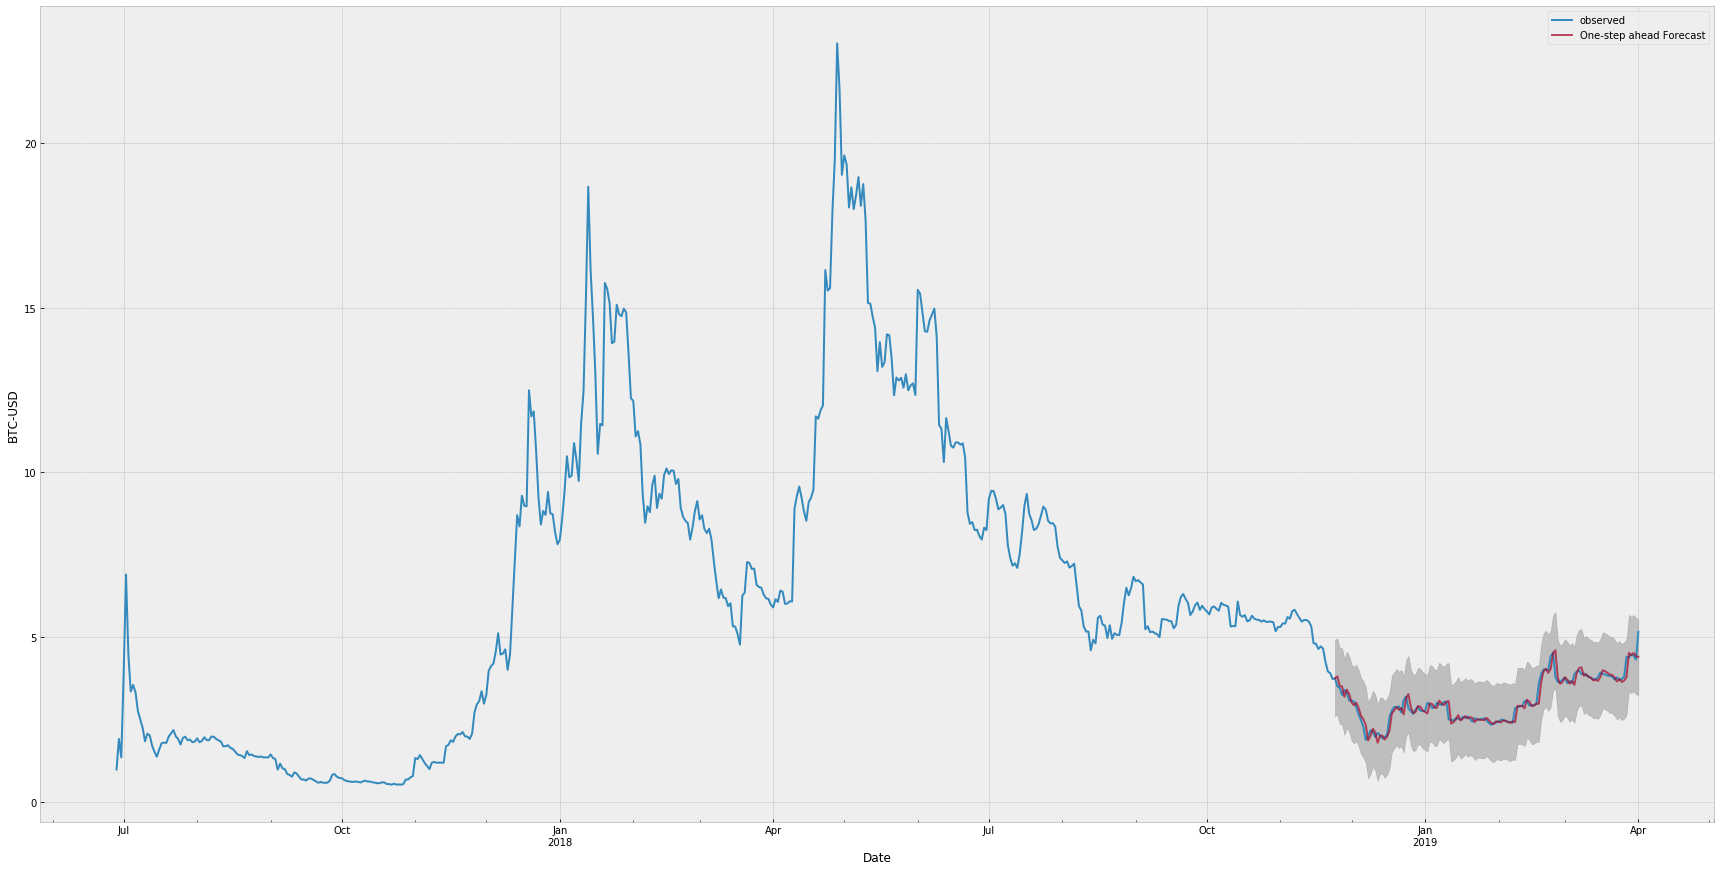

In [24]:
pred = results.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [25]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 0.0374
The R2 of our model is 0.9211


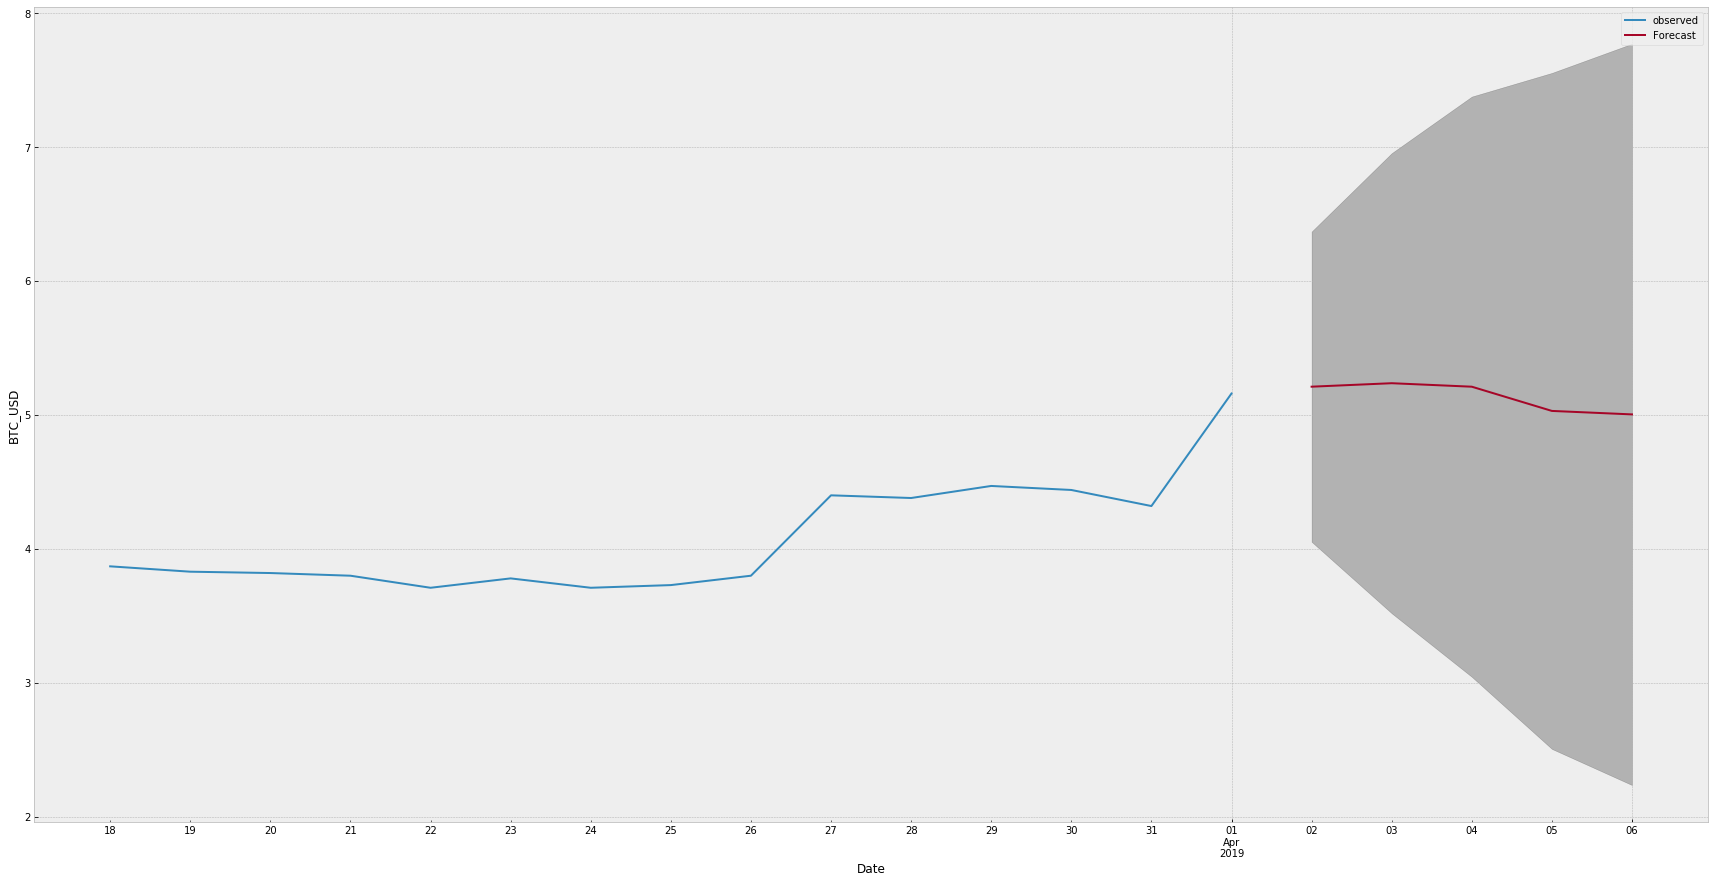

In [26]:
# Forcast the future
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

#### The advanced model fails to outperform the baseline model.

# <table><tr><td bgcolor=orange><font size=3> SARIMA for "Low"

In [27]:
y = data['Low']

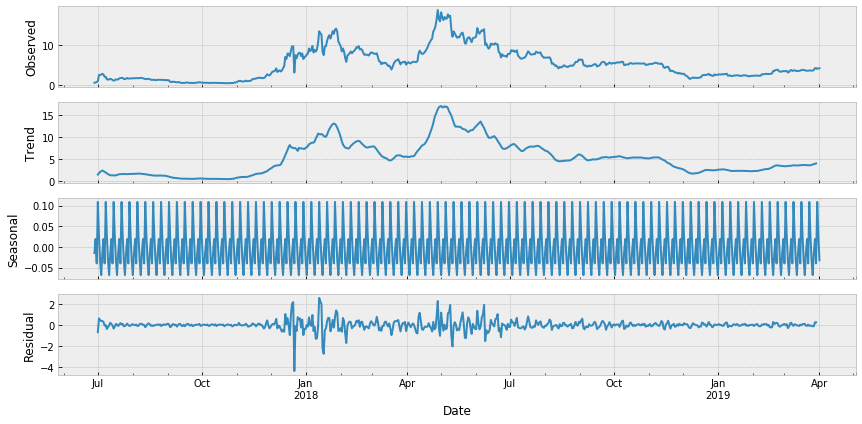

In [28]:
rcParams['figure.figsize'] = 12, 6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [29]:
# y = y['2017':]

In [30]:
# rcParams['figure.figsize'] = 12, 6

# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()

### Build a Baseline Model

In [31]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.resample('MS').mean()
    rolstd = timeseries.resample('MS').std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    print()
    #Perform Ljung-Box test:
    print('Results of Ljung-Box Test:')
    lbtest = acorr_ljungbox(timeseries, lags=5)
    for i in range(5):
        print('Largest Lag Included:{} Test Statistic={}  p-value={}'.format(i, lbtest[0][i], lbtest[1][i]))

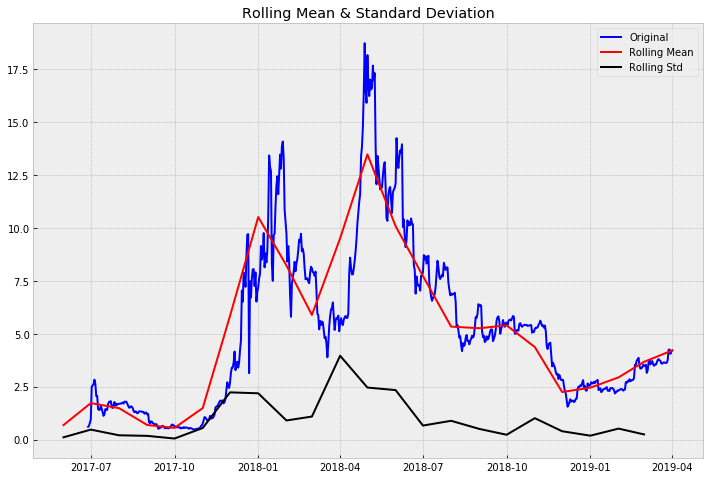

Results of Dickey-Fuller Test:
Test Statistic                  -2.167416
p-value                          0.218284
#Lags Used                       1.000000
Number of Observations Used    641.000000
Critical Value (1%)             -3.440593
Critical Value (5%)             -2.866060
Critical Value (10%)            -2.569177
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=626.1470759202688  p-value=3.441922335968528e-138
Largest Lag Included:1 Test Statistic=1236.4389515481623  p-value=3.241104741600639e-269
Largest Lag Included:2 Test Statistic=1831.8058269787662  p-value=0.0
Largest Lag Included:3 Test Statistic=2412.888450206216  p-value=0.0
Largest Lag Included:4 Test Statistic=2981.8462920545453  p-value=0.0


In [32]:
test_stationarity(y)

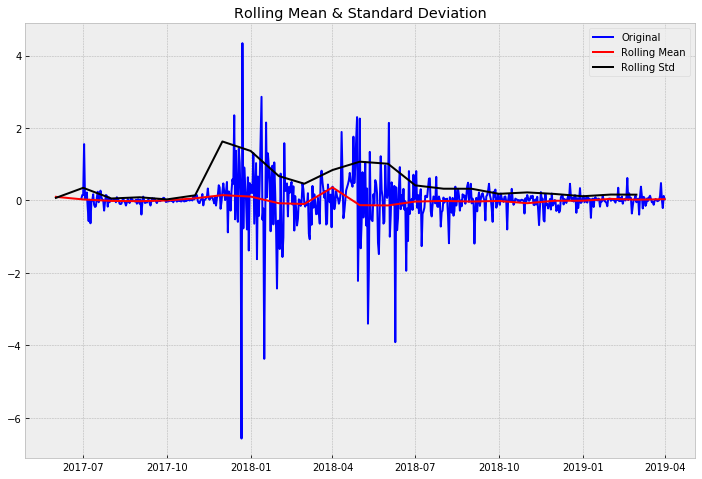

Results of Dickey-Fuller Test:
Test Statistic                 -27.270374
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    641.000000
Critical Value (1%)             -3.440593
Critical Value (5%)             -2.866060
Critical Value (10%)            -2.569177
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=3.696314808172718  p-value=0.05453278662774756
Largest Lag Included:1 Test Statistic=3.9305822993837007  p-value=0.14011508621241683
Largest Lag Included:2 Test Statistic=4.0009597214134685  p-value=0.26136051602242766
Largest Lag Included:3 Test Statistic=4.632055151241444  p-value=0.3271750198226798
Largest Lag Included:4 Test Statistic=7.2525057108202615  p-value=0.20252822842671614


In [33]:
test_stationarity(y.diff(1).dropna())

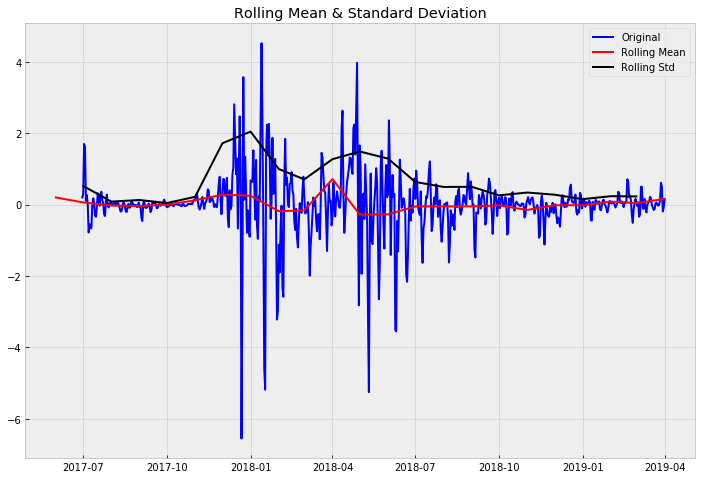

Results of Dickey-Fuller Test:
Test Statistic                -6.565919e+00
p-value                        8.159958e-09
#Lags Used                     1.200000e+01
Number of Observations Used    6.280000e+02
Critical Value (1%)           -3.440806e+00
Critical Value (5%)           -2.866153e+00
Critical Value (10%)          -2.569227e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=129.67281898037896  p-value=4.832076497092895e-30
Largest Lag Included:1 Test Statistic=132.58692871668066  p-value=1.618505736140597e-29
Largest Lag Included:2 Test Statistic=133.5498138981941  p-value=9.289754898788896e-29
Largest Lag Included:3 Test Statistic=137.0883028572574  p-value=1.1855336353720797e-28
Largest Lag Included:4 Test Statistic=137.70101766276903  p-value=5.511316119668722e-28


In [34]:
test_stationarity(y.diff(2).dropna())

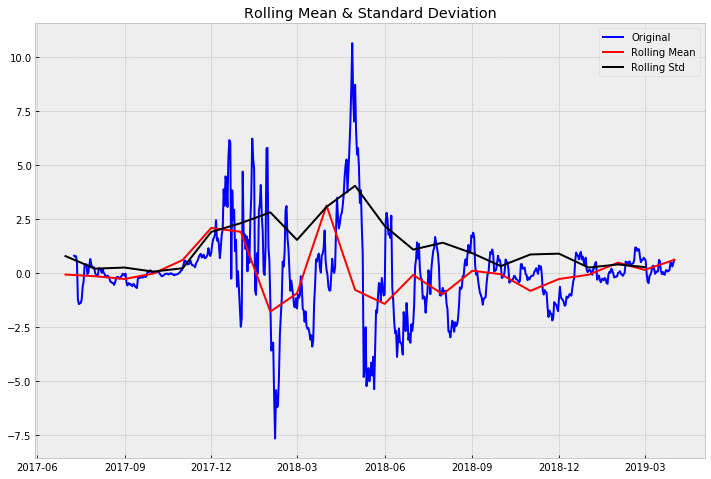

Results of Dickey-Fuller Test:
Test Statistic                  -5.127175
p-value                          0.000012
#Lags Used                      19.000000
Number of Observations Used    611.000000
Critical Value (1%)             -3.441098
Critical Value (5%)             -2.866282
Critical Value (10%)            -2.569295
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=511.5657733660636  p-value=2.8943312098174516e-113
Largest Lag Included:1 Test Statistic=927.2474721116398  p-value=4.474760044629642e-202
Largest Lag Included:2 Test Statistic=1257.9640580917385  p-value=1.9439924426649245e-272
Largest Lag Included:3 Test Statistic=1518.3205937983048  p-value=0.0
Largest Lag Included:4 Test Statistic=1712.6085976724605  p-value=0.0


In [35]:
test_stationarity(y.diff(12).dropna())

#### According to the decomposition of y_train, seasonality is relatively small. 
#### Comparing the results of the first and second difference, we use the first difference.

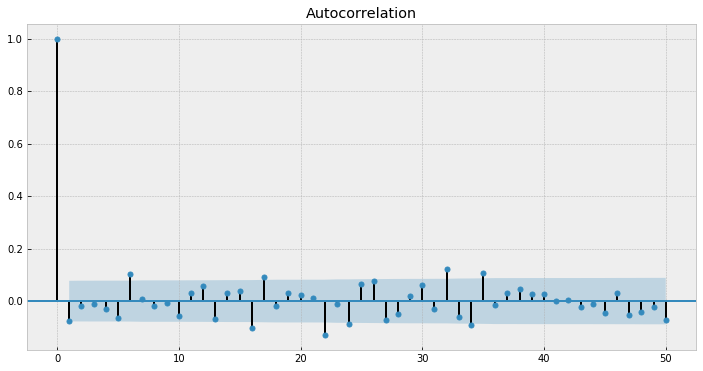

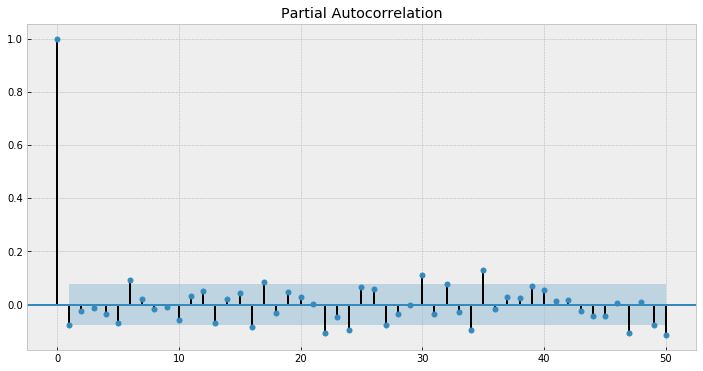

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
acf = plot_acf(y.diff(1).dropna(), lags=50)
pacf = plot_pacf(y.diff(1).dropna(), lags=50)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4164      0.006     68.499      0.000       0.404       0.428
1259.4526600554673


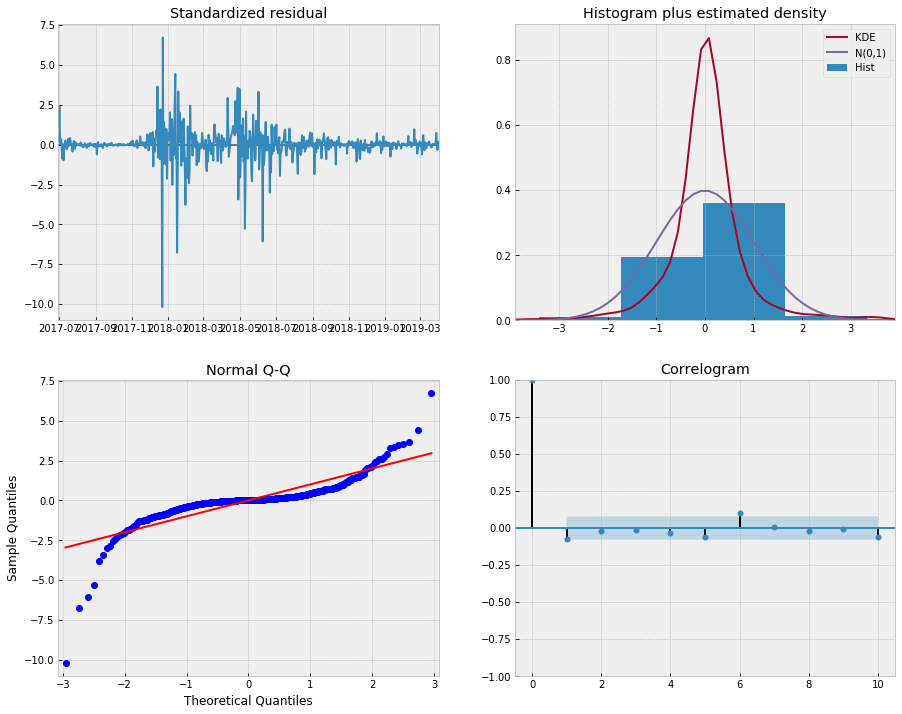

In [37]:
mod_baseline = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order = (0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_baseline = mod_baseline.fit()

print(results_baseline.summary().tables[1])
print(results_baseline.aic)
b = results_baseline.plot_diagnostics(figsize=(15, 12))

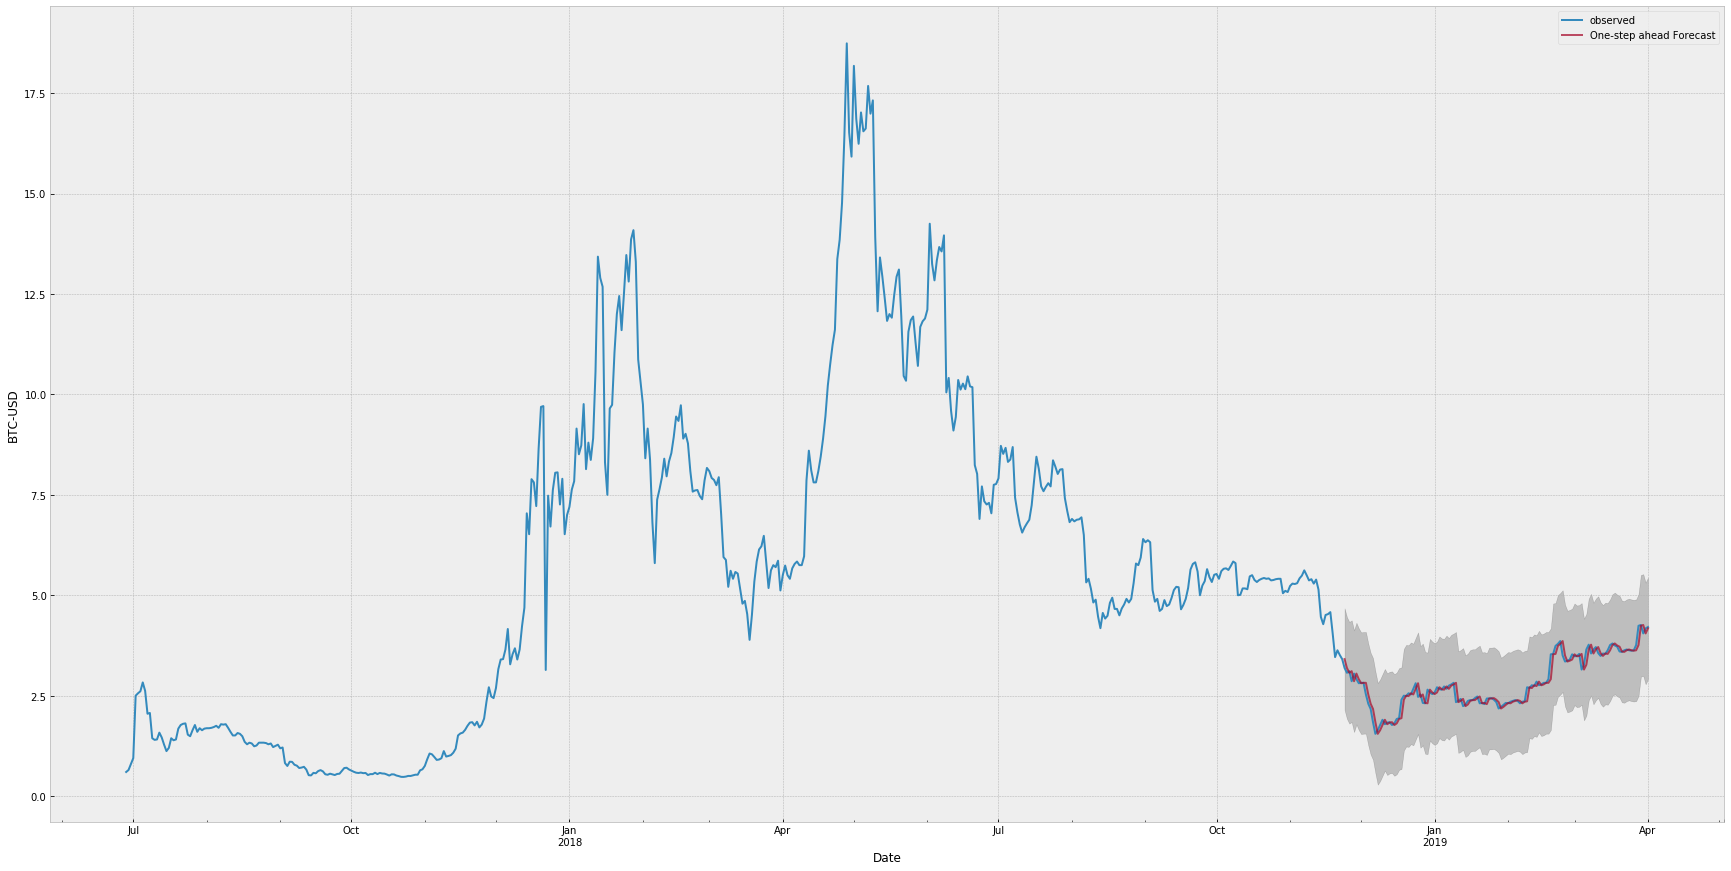

In [38]:
pred = results_baseline.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [39]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 0.0242
The R2 of our model is 0.9424


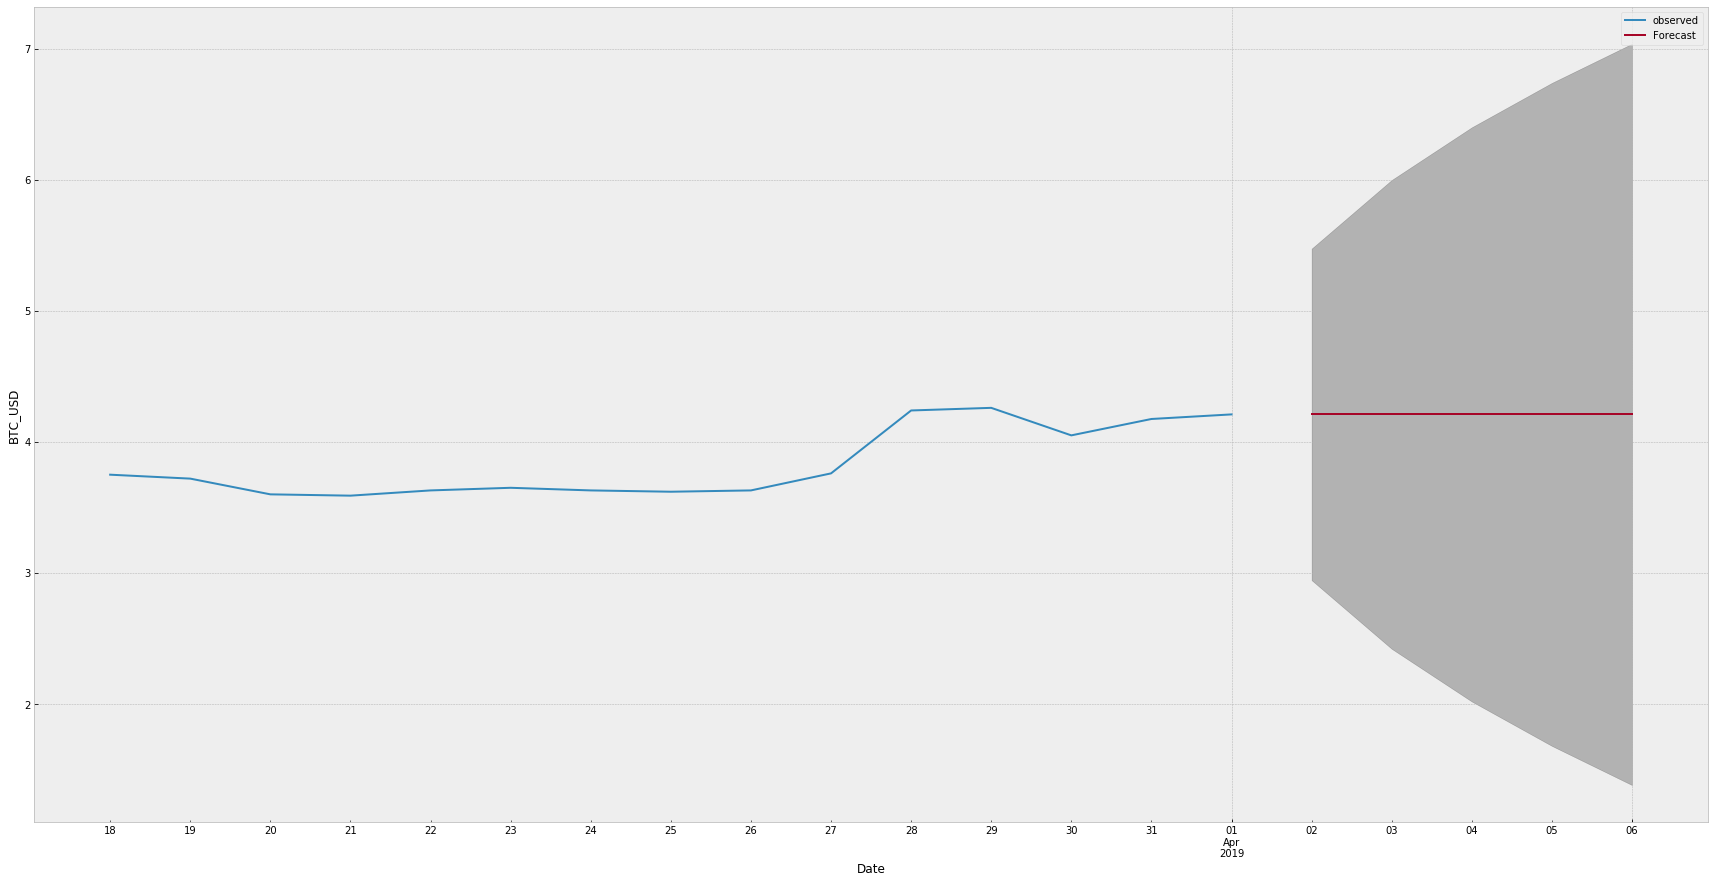

In [40]:
# Forcast the future
pred_uc = results_baseline.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

### Build an Advanced Model by Grid Search

In [41]:
d = [1]
p = q = range(21)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(0, 0, 0, 12)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-1], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 0, 0, 12)
SARIMAX: (0, 1, 2) x (0, 0, 0, 12)
SARIMAX: (20, 1, 19) x (0, 0, 0, 12)
SARIMAX: (20, 1, 20) x (0, 0, 0, 12)


In [42]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)

        except:
            continue

print('Finished...')

AIC_list = AIC_list.dropna()
m = np.amin(AIC_list['AIC'].values) # Find the minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find the index number of the lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1259.4526600554673
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1256.5844015327748
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:1257.2030843747525
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:1252.1255257031096
ARIMA(0, 1, 4)x(0, 0, 0, 12)12 - AIC:1252.2809915172184
ARIMA(0, 1, 5)x(0, 0, 0, 12)12 - AIC:1251.8074498746373
ARIMA(0, 1, 6)x(0, 0, 0, 12)12 - AIC:1246.3044856112615
ARIMA(0, 1, 7)x(0, 0, 0, 12)12 - AIC:1246.82989460176
ARIMA(0, 1, 8)x(0, 0, 0, 12)12 - AIC:1246.1610049236067
ARIMA(0, 1, 9)x(0, 0, 0, 12)12 - AIC:1247.2151348623013
ARIMA(0, 1, 10)x(0, 0, 0, 12)12 - AIC:1246.1514007743604
ARIMA(0, 1, 11)x(0, 0, 0, 12)12 - AIC:1246.9342922768958
ARIMA(0, 1, 12)x(0, 0, 0, 12)12 - AIC:1245.2355254302884
ARIMA(0, 1, 13)x(0, 0, 0, 12)12 - AIC:1241.421242137225
ARIMA(0, 1, 14)x(0, 0, 0, 12)12 - AIC:1242.2947378376957
ARIMA(0, 1, 15)x(0, 0, 0, 12)12 - AIC:1242.5745529548722
ARIMA(0, 1, 16)x(0, 0, 0, 12)12 - AIC:1241.595554139276
ARIMA(0, 1, 17)x(0, 0, 0, 12)12 - AIC:1232.47

ARIMA(6, 1, 20)x(0, 0, 0, 12)12 - AIC:1226.50579583629
ARIMA(7, 1, 0)x(0, 0, 0, 12)12 - AIC:1247.7948605127779
ARIMA(7, 1, 1)x(0, 0, 0, 12)12 - AIC:1249.7560608461242
ARIMA(7, 1, 2)x(0, 0, 0, 12)12 - AIC:1251.3051812621911
ARIMA(7, 1, 3)x(0, 0, 0, 12)12 - AIC:1251.7363467005985
ARIMA(7, 1, 4)x(0, 0, 0, 12)12 - AIC:1255.1149925758887
ARIMA(7, 1, 5)x(0, 0, 0, 12)12 - AIC:1250.1508160339881
ARIMA(7, 1, 6)x(0, 0, 0, 12)12 - AIC:1245.4915483229743
ARIMA(7, 1, 7)x(0, 0, 0, 12)12 - AIC:1251.2853637978476
ARIMA(7, 1, 8)x(0, 0, 0, 12)12 - AIC:1238.55153829675
ARIMA(7, 1, 9)x(0, 0, 0, 12)12 - AIC:1245.0752345472017
ARIMA(7, 1, 10)x(0, 0, 0, 12)12 - AIC:1248.472579651173
ARIMA(7, 1, 11)x(0, 0, 0, 12)12 - AIC:1249.9384342641733
ARIMA(7, 1, 12)x(0, 0, 0, 12)12 - AIC:1247.5342880929927
ARIMA(7, 1, 13)x(0, 0, 0, 12)12 - AIC:1248.3901150243996
ARIMA(7, 1, 14)x(0, 0, 0, 12)12 - AIC:1247.8280464728807
ARIMA(7, 1, 15)x(0, 0, 0, 12)12 - AIC:1236.3378472698294
ARIMA(7, 1, 16)x(0, 0, 0, 12)12 - AIC:1235.271

ARIMA(13, 1, 18)x(0, 0, 0, 12)12 - AIC:1230.7532158365843
ARIMA(13, 1, 19)x(0, 0, 0, 12)12 - AIC:1225.3635555952565
ARIMA(13, 1, 20)x(0, 0, 0, 12)12 - AIC:1226.1256902386158
ARIMA(14, 1, 0)x(0, 0, 0, 12)12 - AIC:1245.3509374289556
ARIMA(14, 1, 1)x(0, 0, 0, 12)12 - AIC:1247.2676141496454
ARIMA(14, 1, 2)x(0, 0, 0, 12)12 - AIC:1243.0700793477831
ARIMA(14, 1, 3)x(0, 0, 0, 12)12 - AIC:1245.0409973029195
ARIMA(14, 1, 4)x(0, 0, 0, 12)12 - AIC:1247.0691901257564
ARIMA(14, 1, 5)x(0, 0, 0, 12)12 - AIC:1256.0338855635434
ARIMA(14, 1, 6)x(0, 0, 0, 12)12 - AIC:1252.3815955917985
ARIMA(14, 1, 7)x(0, 0, 0, 12)12 - AIC:4951.722174052382
ARIMA(14, 1, 8)x(0, 0, 0, 12)12 - AIC:1255.966573126319
ARIMA(14, 1, 9)x(0, 0, 0, 12)12 - AIC:1371.273487832189
ARIMA(14, 1, 10)x(0, 0, 0, 12)12 - AIC:1257.2676490837111
ARIMA(14, 1, 11)x(0, 0, 0, 12)12 - AIC:1256.5532763139365
ARIMA(14, 1, 12)x(0, 0, 0, 12)12 - AIC:1248.630370874765
ARIMA(14, 1, 13)x(0, 0, 0, 12)12 - AIC:1238.4880441671742
ARIMA(14, 1, 14)x(0, 0, 0, 1

ARIMA(20, 1, 15)x(0, 0, 0, 12)12 - AIC:1236.0526638929077
ARIMA(20, 1, 16)x(0, 0, 0, 12)12 - AIC:1234.063766028542
ARIMA(20, 1, 17)x(0, 0, 0, 12)12 - AIC:1229.2414742462508
ARIMA(20, 1, 18)x(0, 0, 0, 12)12 - AIC:1230.1031989027256
ARIMA(20, 1, 19)x(0, 0, 0, 12)12 - AIC:1221.2931524559008
ARIMA(20, 1, 20)x(0, 0, 0, 12)12 - AIC:1225.7216304230928
Finished...


### Min_AIC_list ### 
param                (3, 1, 19)
param_seasonal    (0, 0, 0, 12)
AIC                     1221.25
Name: 82, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4556      0.125      3.640      0.000       0.210       0.701
ar.L2         -0.6257      0.095     -6.582      0.000      -0.812      -0.439
ar.L3         -0.2491      0.113     -2.195      0.028      -0.472      -0.027
ma.L1         -0.5158      0.125     -4.120      0.000      -0.761      -0.270
ma.L2          0.6522      0.097      6.716      0.000       0.462       0.842
ma.L3          0.2210      0.118      1.878      0.060      -0.010       0.452
ma.L4         -0.0266      0.041     -0.657      0.511      -0.106       0.053
ma.L5         -0.0725      0.045     -1.626      0.104      -0.160       0.015
ma.L6          0.1006      0.050      2.008      0.045       0.002  

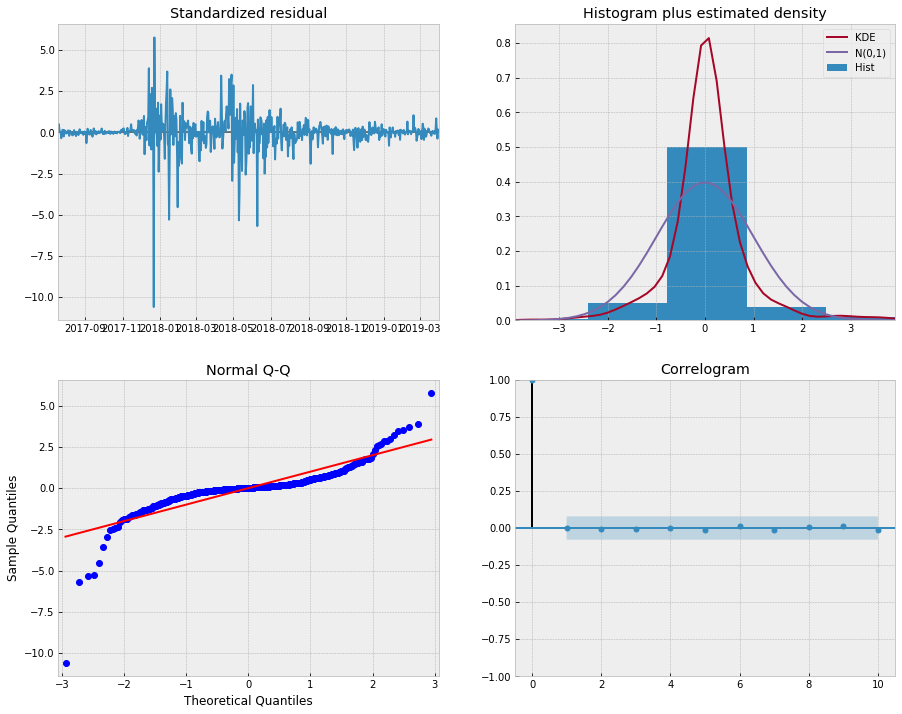

In [43]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])
dia = results.plot_diagnostics(figsize=(15, 12))

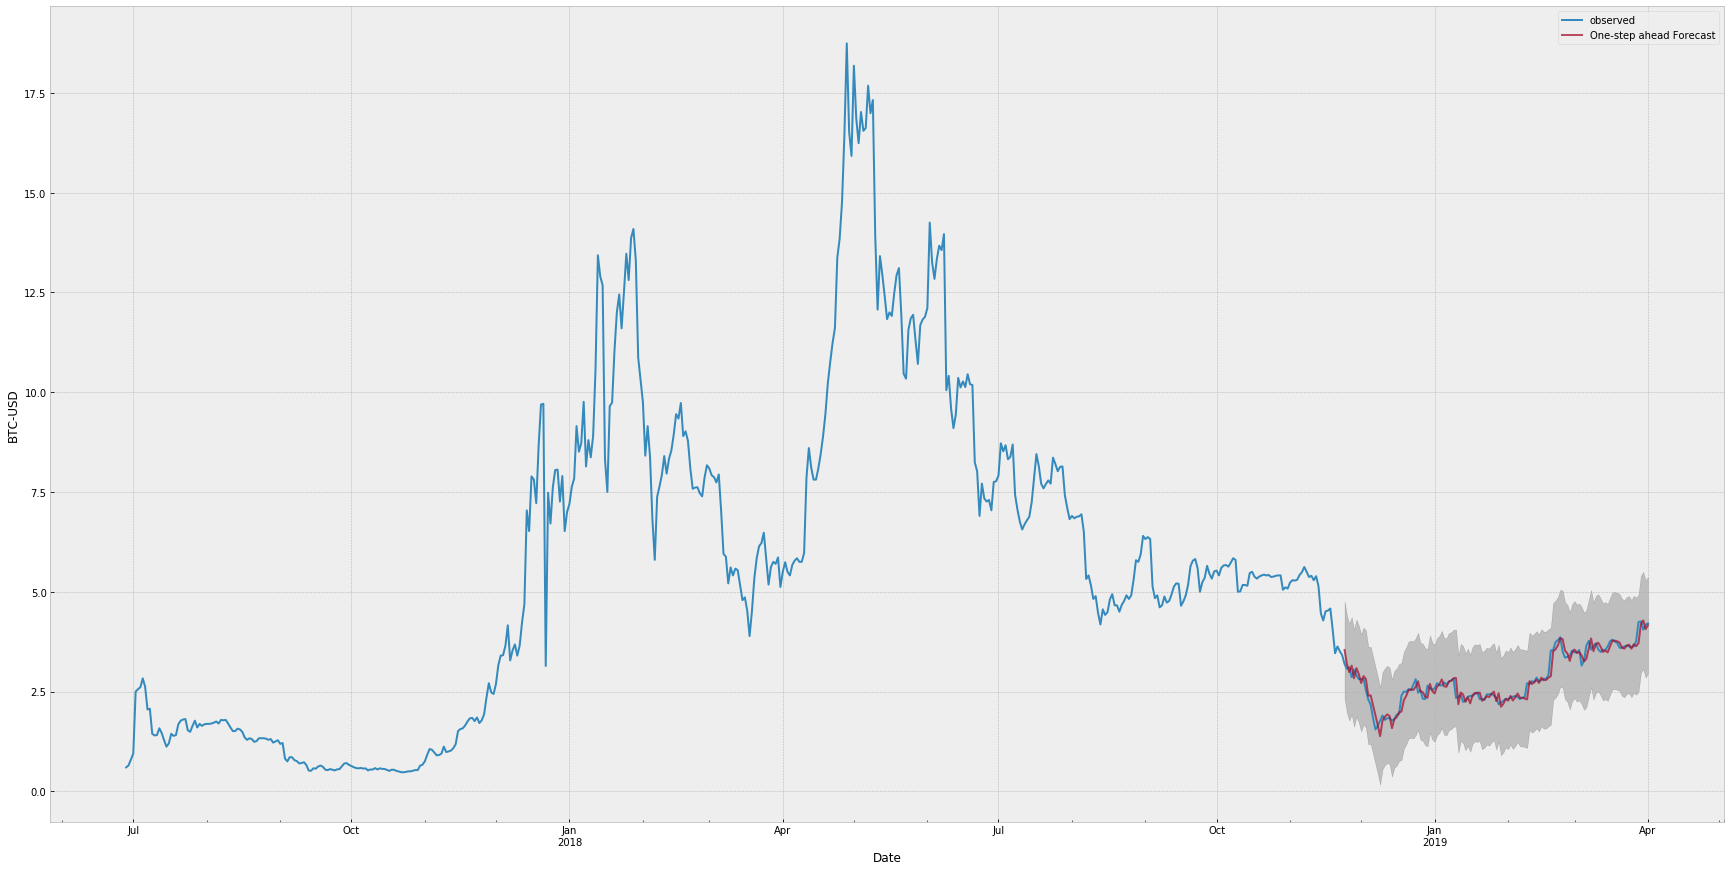

In [44]:
pred = results.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [45]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 0.0283
The R2 of our model is 0.9327


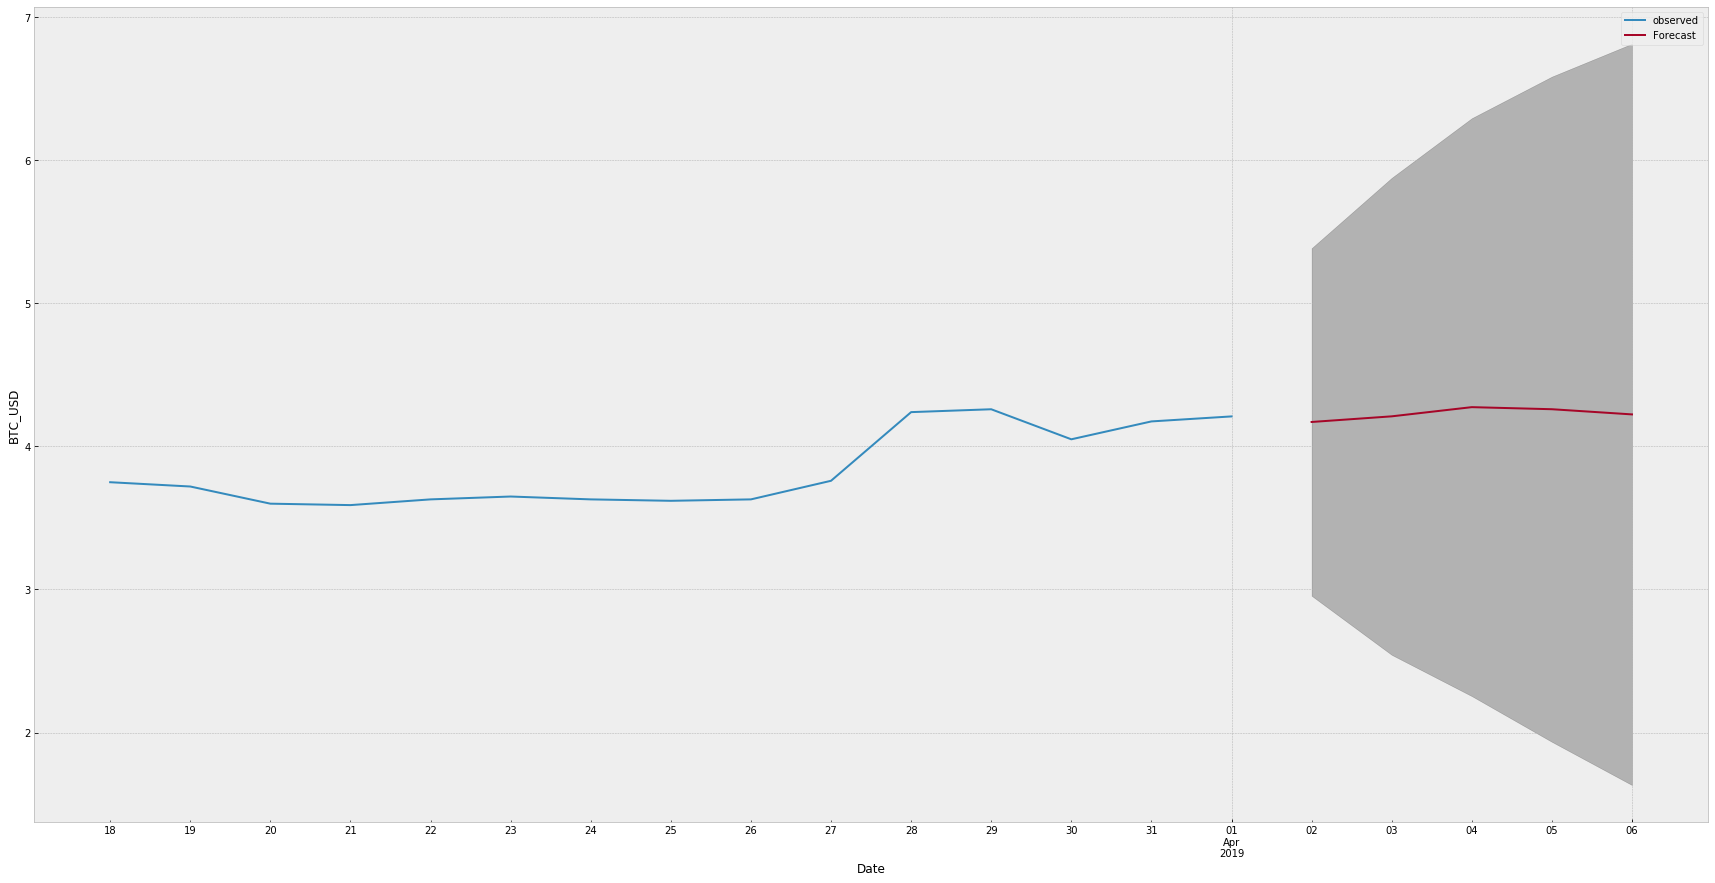

In [46]:
# Forcast the future
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

#### The advanced model fails to outperform the baseline model.